In [18]:
import pandas as pd
import numpy as np
from scipy.stats import levene, shapiro, pearsonr, spearmanr
from scipy.stats import chi2_contingency, chi2
import seaborn as sns
import matplotlib.pyplot as plt

### Chi-Square Test (χ² Test)

Chi-square test is a statistical hypothesis test used to determine whether there is a significant association or independence between two categorical variables. The chi-square test statistic (χ²) measures the discrepancy between the observed counts in a contingency table and the counts that would be expected under the assumption of independence.
$$
χ² = ∑ \frac{(O - E)²}{E}
$$

- `O` represents the observed frequency in a specific cell of the contingency table.
- `E` represents the expected frequency in the same cell under the assumption of independence.

A contingency table (cross-tabulation table) organizes the observed counts of each combination of categories for the two categorical variables being studied. Degrees of freedom in the chi-square test depend on the dimensions of the contingency table. For a 2x2 table, df = 1; for larger tables, df = (rows - 1) * (columns - 1).

**Types of Chi-Square Tests:** 

- **Chi-Square Goodness-of-Fit Test:** Determines if an observed frequency distribution fits a theoretical or expected frequency distribution. It answers questions such as, "Is there a significant difference between the observed and expected frequencies in a single categorical variable?" The chi-square goodness-of-fit test is typically used when the dataset consists of one categorical variable and want to compare its observed frequencies to expected frequencies based on a hypothesis or theoretical model.

- **Chi-Square Test for Independence (or Chi-Square Test of Association):** Determines if there exists a statistically significant association between two categorical variables. It answers questions such as, "Are two categorical variables independent, or is there an association between them?" If the sample size is small or the expected cell frequencies are very low, use Fisher's Exact Test instead.

- **Chi-Square Test for Homogeneity:** Determines if there is a significant difference in the distribution of a categorical variable across different groups or populations. It answers questions like: "Are the distributions of a categorical variable similar across different groups?" The chi-square test for homogeneity is similar to the chi-square test for independence but is applied when you want to compare the distributions of a single categorical variable across multiple groups.

- **McNemar’s Test:** Determines the significance of differences in proportions or frequencies related to a dichotomous categorical variable (e.g., yes/no, success/failure) measured on two related groups or time points. McNemar's test is essentially a chi-square test applied to a specific type of contingency table.

**Key assumptions of the Chi-Square test:**

- Independence of Observations: The observations used in the chi-square test should be independent of each other. In other words, the data points or cases being analyzed should not be related or dependent on each other. Violation of this assumption can lead to inaccurate results.

- Random Sampling: The data should come from a random sample or, in the case of experimental data, should reflect random assignment to treatment groups. This ensures that the results are representative of the larger population from which the sample is drawn.

- Categorical Data: The chi-square test is suitable for analyzing categorical data, such as counts or frequencies within categories. It is not appropriate for continuous or interval data.

- Expected Frequencies: The expected frequencies (E) in each cell of the contingency table (used in chi-square tests of independence) should not be too small (no more than 20% of the cells should have expected frequencies below 5). If expected frequencies are too small, the test may not be reliable, and an alternative test (e.g., Fisher's exact test) may be more appropriate.

- Sample Size: The chi-square test tends to be more reliable with larger sample sizes. Smaller sample sizes can lead to less accurate results and may be less powerful in detecting significant associations.

- No Ordinal Relationship: The chi-square test assumes that there is no ordinal relationship between the categories of the variables being analyzed. The categories are treated as unordered and nominal.

- No Multicollinearity: In the context of chi-square tests of independence, multicollinearity (high correlation) between categories of one variable can lead to instability in the results.



- **Generate Data.**

In [9]:
# Sample data for two groups (e.g., treatment and control groups)
data = pd.DataFrame({
    'Category_A': np.random.choice(['A', 'B', 'C'], size=10000),
    'Category_B': np.random.choice(['X', 'Y', 'Z'], size=10000)
})


- **Perform Chi-Square Test of Independence to determine significance.**

In [16]:
# Create a contingency table
contingency_table = pd.crosstab(data['Category_A'], data['Category_B'])

# Perform the chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results
print("Chi-square statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("\nExpected frequencies table:")
print(expected)


if p < 0.05:
    print("\nReject the Null Hypothesis. There exists a significant association between Category_A and Category_B.")
else:
    print("\nFail to reject the Null Hypothesis. Category_A and Category_B are independent.")

Chi-square statistic: 0.917810278568461
p-value: 0.9219918550350638
Degrees of freedom: 4

Expected frequencies table:
[[1100.8595 1103.166  1090.9745]
 [1110.2143 1112.5404 1100.2453]
 [1129.9262 1132.2936 1119.7802]]

Fail to reject the Null Hypothesis. Category_A and Category_B are independent.


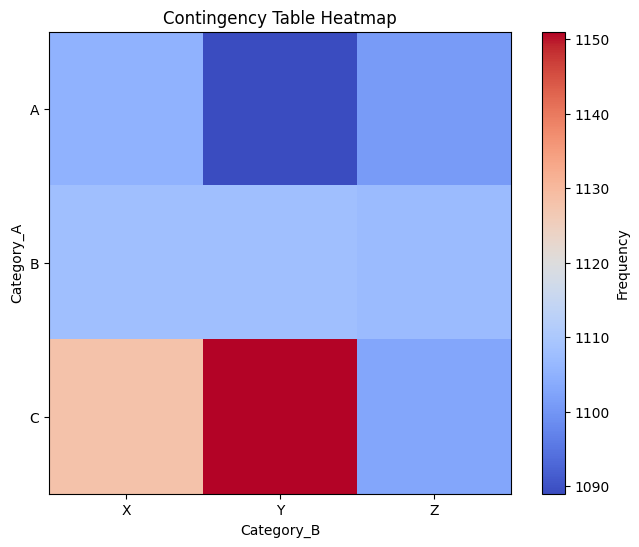

Chi-Square Statistic: 0.917810278568461
p-value: 0.9219918550350638


In [12]:
plt.figure(figsize=(8, 6))
plt.imshow(contingency_table, cmap='coolwarm', interpolation='none')
plt.colorbar(label='Frequency')
plt.xticks(range(len(contingency_table.columns)), contingency_table.columns)
plt.yticks(range(len(contingency_table.index)), contingency_table.index)
plt.xlabel('Category_B')
plt.ylabel('Category_A')
plt.title('Contingency Table Heatmap')
plt.show()

print(f'Chi-Square Statistic: {chi2}')
print(f'p-value: {p}')


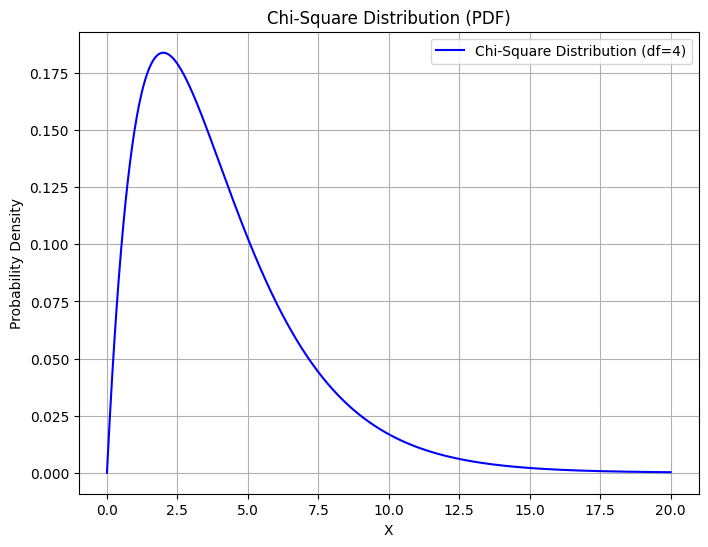

In [19]:
# Generate data points for the chi-square distribution
x = np.linspace(0, 20, 1000)  # Adjust the range as needed
y = chi2.pdf(x, dof)  # Probability density function (PDF)

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(x, y, label=f'Chi-Square Distribution (df={dof})', color='b')

# Add labels and a legend
plt.xlabel('X')
plt.ylabel('Probability Density')
plt.title('Chi-Square Distribution (PDF)')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()